In [161]:
import numpy as np
import scipy.special
from scipy.stats import binom, norm
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, FloatSlider, IntSlider, FloatLogSlider

For a discrete random variable we have a function taking some discrete set of possible values to a set of probabilities which sum to 1. We call this function the *probability mass function*. We can sum the probabilities within a range to find the probability a result from the distribution lies between a and b.

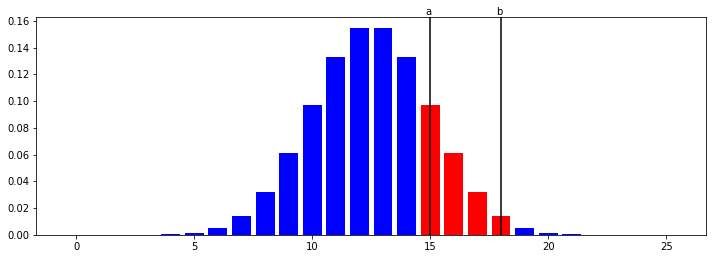

In [162]:
n = 25
p = 0.5
rs = np.arange(0,n+1)
ps = binom.pmf(rs, n, p)
a = 15
b = 18

cond = np.logical_and(rs >= a, rs <= b)

f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(4)
ax.annotate('a', xy = (a-0.2,1.01), xycoords = ('data', 'axes fraction'))
ax.annotate('b', xy = (b-0.2,1.01), xycoords = ('data', 'axes fraction'))
ax.axvline(a, color = 'black')
ax.axvline(b, color ='black')

ax.bar(rs[~cond], ps[~cond], color = 'blue')
ax.bar(rs[cond], ps[cond], color = 'red');

For a continuous random variable such as height this isn't possible because the probability of any single value occuring is 0. Suppose we collected data on heights and constructed a histogram. We can scale the histogram (remember that frequency $\propto$ area) so the sum of all the areas is 1. Then the probability of the results is just the area between a and b.

In [163]:
#Based on distribution of height for UK adult female population
mean = 1.62
sd = 0.0711,

#set global variables to avoid unnecessary resampling/redrawing
current_num = 0
rs
def histogram (n = 100, bins = 15, a = 1.68, b = 1.71):
    global current_num, rs
    
    #if sample size has changed, resample for new histogram
    num = int(n)
    if num != current_num:
        rs = norm.rvs(mean, sd, size = num)
        current_num = num
    
    #draw graph
    cond = np.logical_and(rs >= a, rs <= b)
    f, ax = plt.subplots()
    f.set_figwidth(12)
    f.set_figheight(5)
    ax.axvline(a, color = 'black')
    ax.axvline(b, color ='black')
    ax.annotate('a', xy = (a,1.01), xycoords = ('data', 'axes fraction'))
    ax.annotate('b', xy = (b,1.01), xycoords = ('data', 'axes fraction'))
    fds, vals, patches = ax.hist(rs, color = 'blue', bins = bins, density = True)
    width = vals[1] - vals[0]
    for i in range(bins):
        if(vals[i] + width/2>a and vals[i] + width/2 <b):
            patches[i].set_fc('r')

In [164]:
interact(histogram,  bins=(10,100,5), a = (1.35,1.9,0.01), b = (1.35,1.9,0.01), n = FloatLogSlider(value=100, base=10, min = 2, max = 5, step = 0.5, readout_format = 'd'));

interactive(children=(FloatLogSlider(value=100.0, description='n', max=5.0, min=2.0, readout_format='d', step=…

What if $a$ and $b$ don't overlap with our bins nicely? Then we are estimating the result. We need more data and smaller bins to give us ever closer estimates for any values of a and b.

So what we end up with is some continuous function whose area between two points gives the probability of a result being between these two values. This is called a *probability density function*.

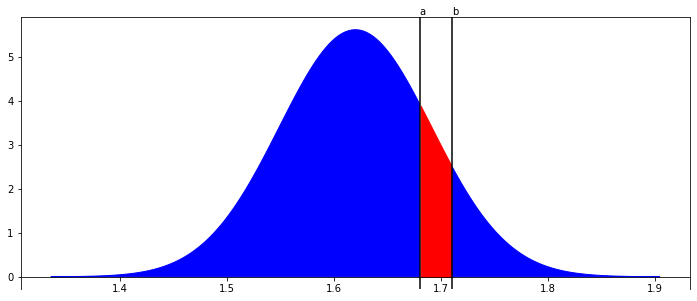

In [165]:
mean = 1.62
sd = 0.0711
xs = np.linspace(mean-4*sd, mean+4*sd,500)
ps = norm.pdf(xs, mean, sd)
a = 1.68
b = 1.71

cond = np.logical_and(rs >= a, rs <= b)

f, ax = plt.subplots()
f.set_figwidth(12)
f.set_figheight(5)
ax.spines['bottom'].set_position(('data', 0.0))

ax.axvline(a, color = 'black')
ax.axvline(b, color ='black')
ax.annotate('a', xy = (a,1.01), xycoords = ('data', 'axes fraction'))
ax.annotate('b', xy = (b,1.01), xycoords = ('data', 'axes fraction'))
ax.fill_between(xs, ps, 0, np.logical_or(xs<a, xs > b), color = 'b');
ax.fill_between(xs, ps, 0, np.logical_and(xs>=a, xs <= b), color = 'r');